In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import tensorflow as tf
from sklearn.model_selection import train_test_split

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:98: UserWarning: unable to load libtensorflow_io_plugins.so: unable to open file: libtensorflow_io_plugins.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so: undefined symbol: _ZN3tsl6StatusC1EN10tensorflow5error4CodeESt17basic_string_viewIcSt11char_traitsIcEENS_14SourceLocationE']
  warnings.warn(f"unable to load libtensorflow_io_plugins.so: {e}")
/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:104: UserWarning: file system plugins are not loaded: unable to open file: l

/kaggle/input/digit-recognizer/sample_submission.csv
/kaggle/input/digit-recognizer/train.csv
/kaggle/input/digit-recognizer/test.csv


In [2]:
BASE_PATH = '/kaggle/input/digit-recognizer/'
x_train = pd.read_csv(os.path.join(BASE_PATH, 'train.csv'))
x_test_out = pd.read_csv(os.path.join(BASE_PATH, 'test.csv'))

y_train = x_train.label
x_train = x_train.drop('label', axis=1)

x_train, x_test, y_train, y_test = train_test_split(x_train, y_train, test_size=0.33, random_state=42)

<Axes: >

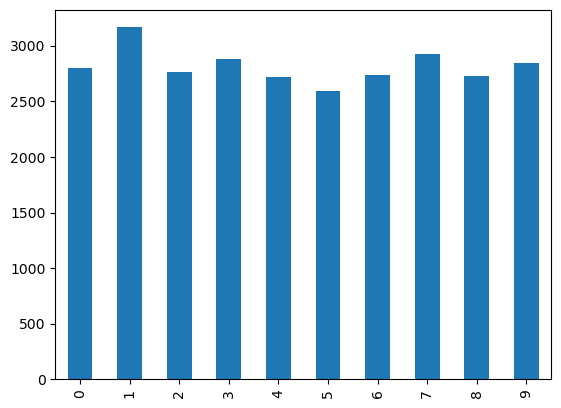

In [3]:
y_train.value_counts().sort_index().plot.bar()

In [4]:
x_train.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
38060,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
22672,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
14625,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1475,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
27894,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
# Reshape the data
x_train = x_train.values.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.values.reshape(x_test.shape[0], 28, 28, 1)

# Convert the data to float32
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

# Normalize the data
x_train /= 255
x_test /= 255

# Create the model
model = tf.keras.Sequential([
  tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
  tf.keras.layers.MaxPooling2D((2, 2)),
  tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
  tf.keras.layers.MaxPooling2D((2, 2)),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(10, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(x_train, y_train, epochs=6)

Epoch 1/6
880/880 [==============================] - 15s 16ms/step - loss: 0.2389 - accuracy: 0.9280
Epoch 2/6
880/880 [==============================] - 14s 16ms/step - loss: 0.0735 - accuracy: 0.9779
Epoch 3/6
880/880 [==============================] - 14s 16ms/step - loss: 0.0540 - accuracy: 0.9828
Epoch 4/6
880/880 [==============================] - 14s 16ms/step - loss: 0.0426 - accuracy: 0.9871
Epoch 5/6
880/880 [==============================] - 14s 16ms/step - loss: 0.0333 - accuracy: 0.9892
Epoch 6/6
880/880 [==============================] - 14s 16ms/step - loss: 0.0260 - accuracy: 0.9921


In [6]:
# Evaluate the model
model.evaluate(x_test, y_test)

434/434 [==============================] - 2s 5ms/step - loss: 0.0481 - accuracy: 0.9860


[0.0480872206389904, 0.9860028624534607]

In [7]:
# Reshape the data
x_test_out = x_test_out.values.reshape(x_test_out.shape[0], 28, 28, 1)

x_test_out = x_test_out.astype('float32')

# Normalize the data
x_test_out /= 255

In [8]:
res = model.predict(x_test_out)

875/875 [==============================] - 5s 5ms/step


In [9]:
labels = np.argmax(res, axis=1)
imageid = list(range(1, len(labels)+1))

df_out = pd.DataFrame({'ImageId': imageid, 'Label': labels})
df_out

,ImageId,Label
0,1,2
1,2,0
2,3,9
3,4,9
4,5,3
...,...,...
27995,27996,9
27996,27997,7
27997,27998,3
27998,27999,9


2


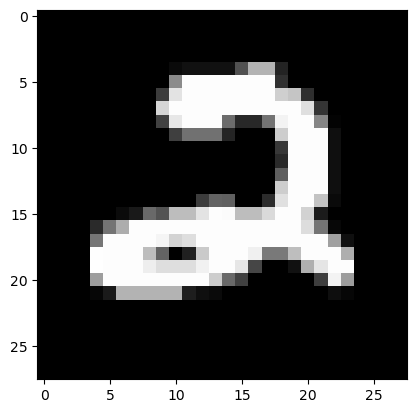

0


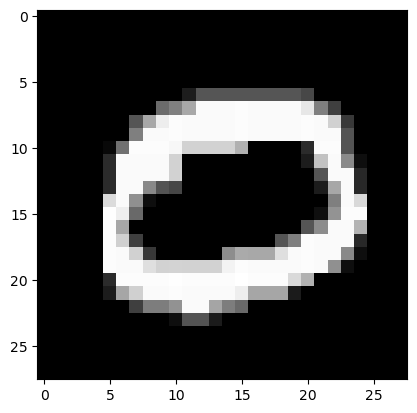

9


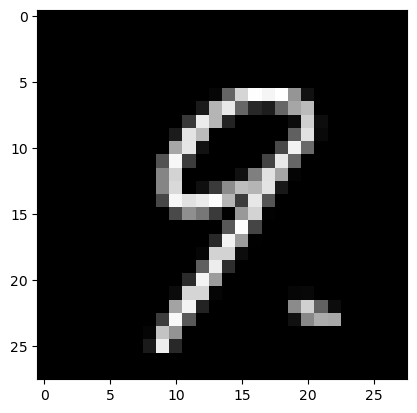

9


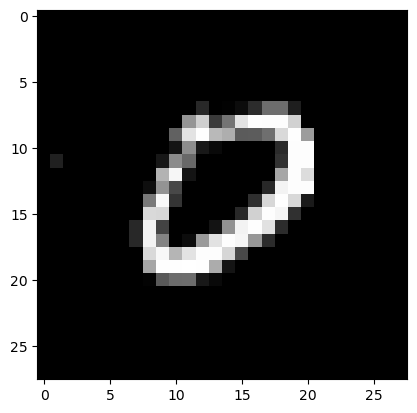

3


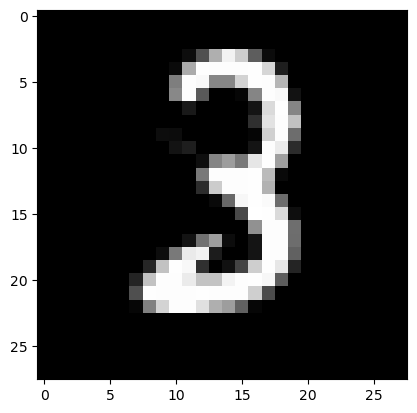

7


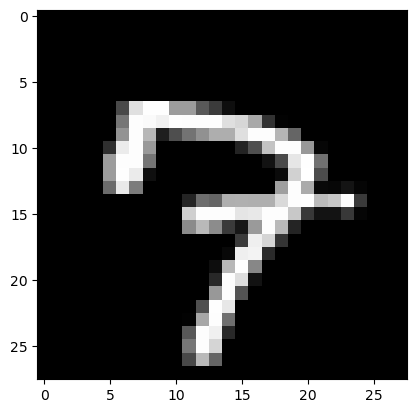

0


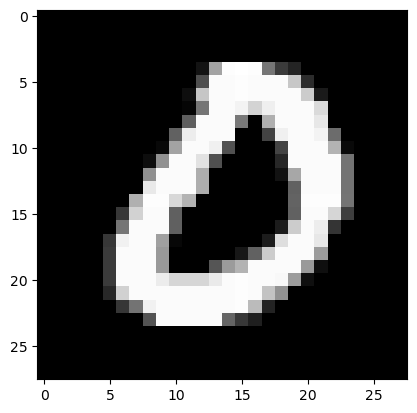

3


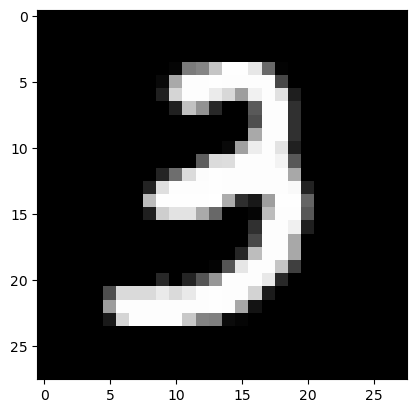

0


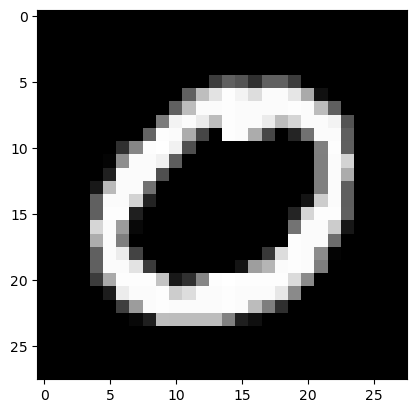

3


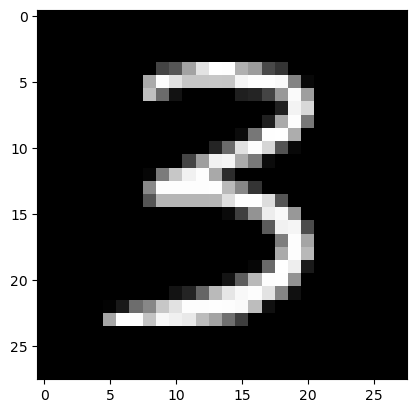

In [10]:
import matplotlib.pyplot as plt
from PIL import Image

for i in range(10):
    print(df_out.Label.iloc[i])
    plt.imshow(x_test_out[i]*255, cmap='gray', vmin=0, vmax=255)
    plt.show()

In [11]:
df_out.to_csv('result.csv', index=False)